In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import time
import sys
import os
import argparse
from numpy.random import normal, uniform
from numpy.linalg import norm
import itertools
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.datasets import load_svmlight_file
import datetime
from IPython import display
from tqdm import tqdm
#import IPython

from contextlib import redirect_stdout
import shutil
import subprocess
from tournament import * 
from numpy.random import RandomState
import matplotlib.ticker as tck
myrepr = lambda x: repr(round(x, 4)).replace('.',',') if isinstance(x, float) else repr(x) #for some methods we used diffrent rounding
intrepr = lambda x: int(x) if x.is_integer() else round(x,4) 

# Experiments on known prior

# Drawing section 

In [5]:
from numba import jit, njit, prange

In [10]:
plots_titles

['d=$10^2$', 'd=$10^3$']

In [9]:
d_str = {10**2:r"$10^2$", 10**3:r"$10^3$", 10**5:r"$10^5$",10**6:r"$10^6$", 10**7:r"$10^7$", 10**9:r"$10^9$"}

k_ar_frac =  np.array([0.01,0.1,0.2,0.5,0.9])
plots_titles =  list(map (lambda d: r"d="+ d_str[d], d_ar))

# Hists

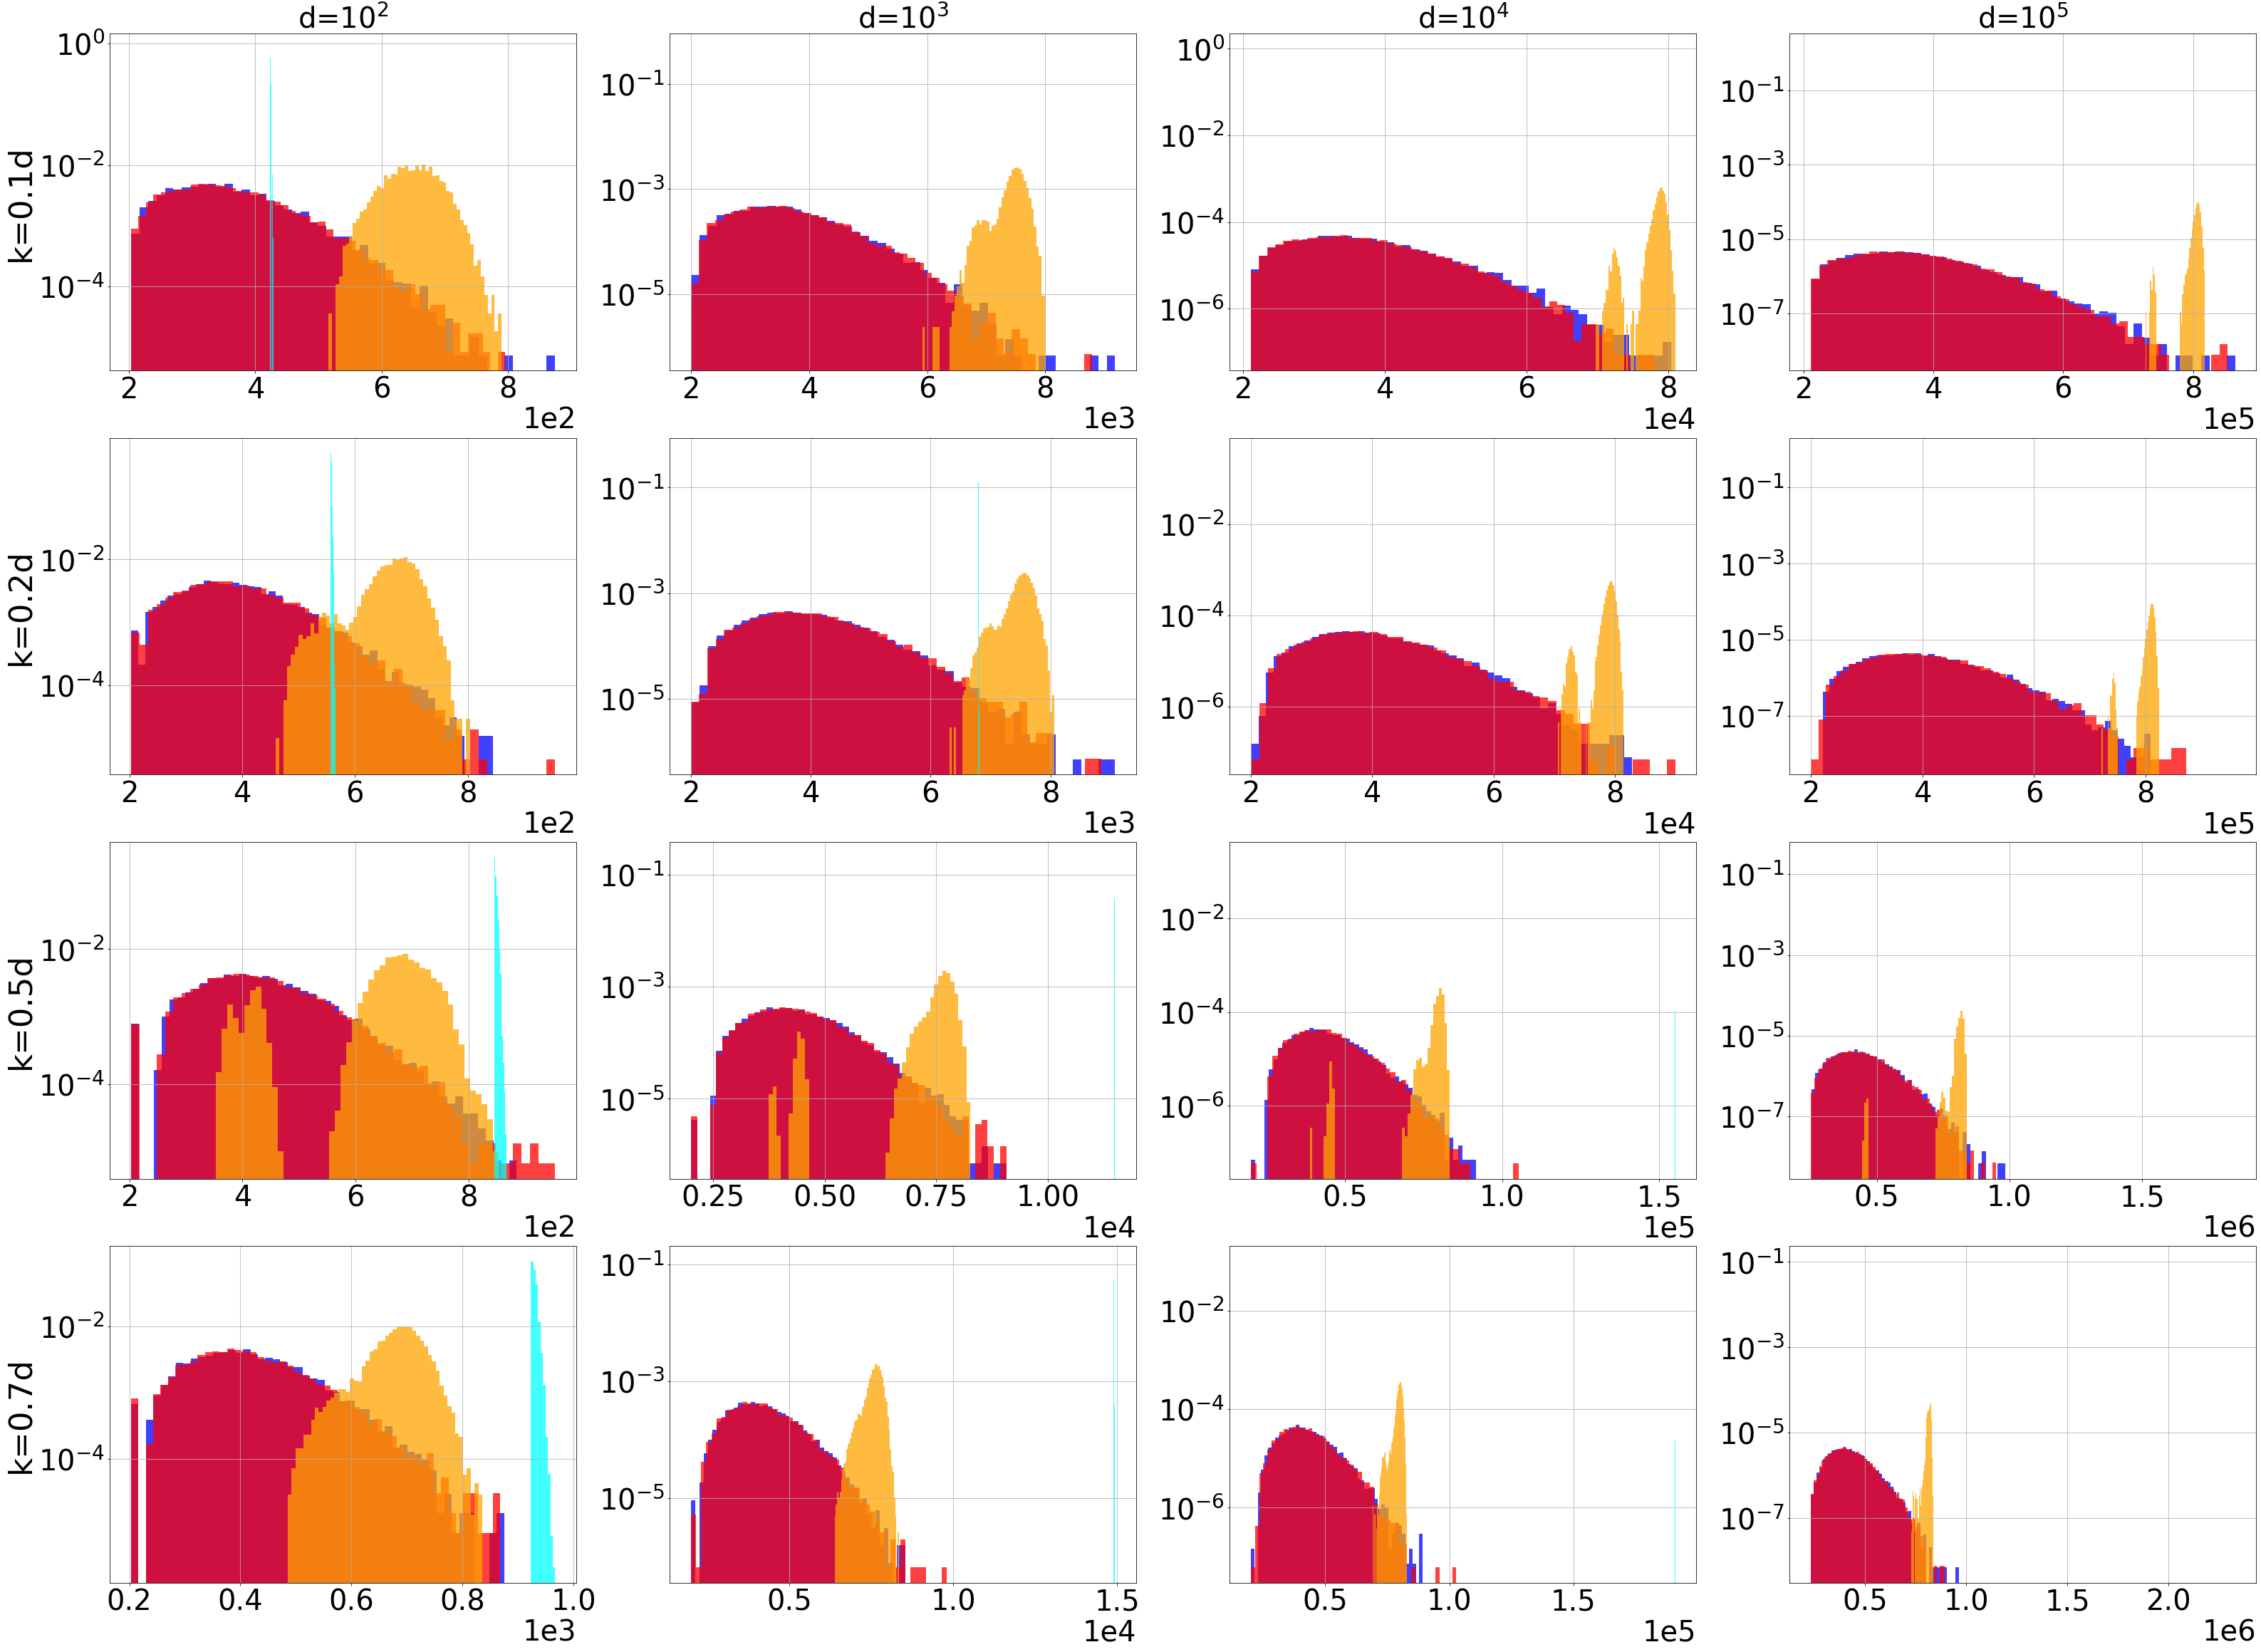

saving is finished!


In [27]:
def draw_hist_and_save(fig_ax_ar, d_ar, k_ar_frac, plot_path, filename, y_label, plots_titles, is_legend):
    size = 40
    marker_size = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = 30  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size + 5  # 40
    #if len(dataset_ar)==4:
    plt.rcParams["figure.figsize"] = [54,40]
    #if len(dataset_ar)==1:
    #plt.rcParams["figure.figsize"] = [15,10]
    #plt.rcParams["figure.figsize"] = [70,10]
    
    (fig, axs) = fig_ax_ar
    limits = (0, 1)
    
    if is_legend:
        legend = axs[0,0].legend(loc="best", framealpha=0.5)
    
    for i,k in enumerate(k_ar_frac):
        #axs[i,0].set_ylabel(y_label[i])
        axs[i,0].set(ylabel=y_label[i])
        for j,d in enumerate(d_ar):
            axs[0,j].set_title(f"{plots_titles[j]}")#; $n$ = {n_ar[0]}")
            
            #legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
            #legend = axs[dataset_num].legend(loc="upper right", framealpha=0.5)
            #legend = axs[i,j].legend(loc=legend_location[dataset_num], framealpha=0.5)
            axs[i,j].set_yscale('log')
            axs[i,j].grid()
            
            #axs[i,j].xaxis.set_major_locator(tck.AutoLocator())
            #axs[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator())
            #axs[i,j].xaxis.set_major_formatter(tck.ScalarFormatter(useMathText=True))
            
            #axs[i,j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
            axs[i,j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
            
            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8), numticks=10)
            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.6,0.8), numticks=5)
            
            #axs[i,j].xaxis.set_minor_locator(locmin)
            #axs[i,j].xaxis.set_minor_formatter(tck.NullFormatter())
            #axs[i,j].set_ylim(limits)
            #print(axs[dataset_num].get_ylim())
    where = plot_path + "_0_" + filename
    fig.savefig(plot_path + "_0_" + filename, bbox_inches='tight')
    plt.show()
    print(f"saving is finished!")


color_ar = ['blue', 'red', 'orange', 'aqua', 'violet']+[ 'darkorange','cornflowerblue', 'darkgreen',
                              'coral', 'lime',
                              'darkgreen', 'goldenrod', 'maroon',
                              'black', 'brown', 'yellowgreen', "purple", "violet", "magenta", "green"
                              ]

project_path = os.getcwd() + "/"
experiment_type = "synthetic"
plot_path = project_path + "plot_{0}/".format(experiment_type)
x_axis = "hist"

main_title = "prior_impact_qs_rand"
main_title = "prior_impact_qs_det"
main_title = "prior_impact_qs_med"
main_title = "best_quick_select"
main_title = "prior_impact"
main_title = "quick_select_and_tournament"
#main_title = "check"

if main_title == "prior_impact":#for tournament
    exps = ["tournament"]
    distribution_family_ar = ["uniform", "normal"]
    pivot_ar = ["random", "deterministic", "median"]

elif main_title == "prior_impact_qs_rand":
    exps = ["quickselect"]
    distribution_family_ar = ["uniform", "normal"]
    pivot_ar = ["random"]
    
elif main_title == "prior_impact_qs_det":
    exps = ["quickselect"]
    distribution_family_ar = ["uniform", "normal"]
    pivot_ar = ["deterministic"]
    
elif main_title == "prior_impact_qs_med":
    exps = ["quickselect"]
    distribution_family_ar = ["uniform", "normal"]
    pivot_ar = ["median"]
    
elif main_title == "best_quick_select":
    exps = ["quickselect"]
    distribution_family_ar = ["normal"]
    pivot_ar = ["random", "deterministic", "median"]
    
elif main_title == "quick_select_and_tournament":
    exps = ["quickselect", "tournament"]
    distribution_family_ar = ["normal"]
    pivot_ar = ["random", "deterministic", "median"] 
    
elif main_title == "check":
    exps = ["tournament", "quickselect"]
    distribution_family_ar = ["uniform", "normal"]
    pivot_ar = ["random", "deterministic", "median"]
else:
    raise ValueError ("wrong preset")
    
mean = 0.0
sigma = 1.0
left = -100
right = 100

n_samples_dict = {"tournament":{10**2:10**5, 10**3:10**5, 10**4:10**4, 10**5:500}, "quickselect":{10**2:10**4, 10**3:10**4, 10**4:10**4, 10**5:10**4}}

bins_dict = {"tournament":10 , "quickselect": 50}

d_ar = np.array([10**2, 10**3, 10**5, 10**7, 10**9], dtype=int)
d_ar = np.array([10**2, 10**3, 10**4, 10**5], dtype=int)
#d_ar = np.array([10**2, 10**3, 10**4], dtype=int)

#d_ar = np.array([10**2,10**3], dtype=int)

k_ar_frac =  np.array([0.1,0.2,0.5,0.7])
#k_ar_frac =  np.array([0.1,0.5])

draw = 1
is_legend=0

if not os.path.exists(plot_path):
    os.makedirs(plot_path)
        
d_str = {10**2:r"$10^2$", 10**3:r"$10^3$", 10**4:r"$10^4$", 10**5:r"$10^5$",10**6:r"$10^6$", 10**7:r"$10^7$", 10**9:r"$10^9$"}

plots_titles =  list(map (lambda d: r"d="+d_str[d], d_ar))

y_label_ar = list(map (lambda k_frac: f"k={k_frac}d", k_ar_frac))
filename = "{0}_{1}_{2}_{3}.pdf".format(main_title, x_axis, "-".join(exps), "-".join(plots_titles), "-".join(y_label_ar))

fig, axs = plt.subplots(k_ar_frac.shape[0], d_ar.shape[0])
#axs[dataset_num].plot(its, norms, label=all_labels_ar[i], color=color_ar_1[i], ls = line_style_ar[0],marker = marker_ar[i], ms = 30, markevery=markevery, markerfacecolor=color_ar_1[i], markeredgecolor = 'black')
for i,k_frac in enumerate(k_ar_frac):
    for j,d in enumerate(d_ar):
        
        folder_quickselect_ar, file_quickselect_ar, label_quickselect_ar = [],[],[]
        folder_tournament_ar, file_tournament_ar, label_tournament_ar = [],[],[]
        for distribution_family in distribution_family_ar:
            if "quickselect" in exps:
                if distribution_family == "normal":
                    distribution = distribution_family+f"_m-{myrepr(mean)}_s-{myrepr(sigma)}"
                    folder_quickselect_ar += ['{0}_{1}'.format(experiment_type, f"quickselect-{pivot}") for pivot in pivot_ar]
                    file_quickselect_ar += ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, int(k_frac*d)) for pivot in pivot_ar]
                    label_quickselect_ar += ["quickselect; {0}; N({1},{2})".format(pivot, intrepr(mean), intrepr(sigma)) for pivot in pivot_ar]
                elif distribution_family == "uniform":
                    distribution = distribution_family+f"_l-{myrepr(left)}_r-{myrepr(right)}"
                    folder_quickselect_ar += ['{0}_{1}'.format(experiment_type, f"quickselect-{pivot}") for pivot in pivot_ar]
                    file_quickselect_ar += ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, int(k_frac*d)) for pivot in pivot_ar]
                    label_quickselect_ar += ["quickselect; {0}; U[{1},{2}]".format(pivot,left,right) for pivot in pivot_ar]
                else:
                    raise ValueError("wrong distribution")
            if "tournament" in exps:
                if distribution_family == "normal":
                    distribution = distribution_family+f"_m-{myrepr(mean)}_s-{myrepr(sigma)}"
                    folder_tournament_ar += ['{0}_{1}'.format(experiment_type, f"tournament") ]
                    file_tournament_ar += ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["tournament"][d], d, int(k_frac*d))]
                    label_tournament_ar += ["tournament; N({0},{1})".format(intrepr(mean), intrepr(sigma))]
                elif distribution_family == "uniform":
                    distribution = distribution_family+f"_l-{myrepr(left)}_r-{myrepr(right)}"
                    folder_tournament_ar += ['{0}_{1}'.format(experiment_type, f"tournament") ]
                    file_tournament_ar += ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["tournament"][d], d, int(k_frac*d))]
                    label_tournament_ar += ["tournament; U[{0},{1}]".format(left,right)]
                else:
                    raise ValueError("wrong distribution")
            
        folder_ar = folder_quickselect_ar + folder_tournament_ar
        file_ar = file_quickselect_ar + file_tournament_ar
        label_ar = label_quickselect_ar + label_tournament_ar
        
        for t, (folder,file,label) in enumerate(zip (folder_ar,file_ar,label_ar)):
            logs_path = project_path + "logs/logs_{0}/".format(folder)
            logs_file = logs_path + file
            if os.path.isfile(logs_file):
                tc_hist = np.load(logs_file).astype(int)
                #print(folder," ",file, " ",label, " ", tc_hist.shape[0])
                if draw:
                    if label[0] == "q":
                        bins = bins_dict["quickselect"]
                    else: 
                        bins = bins_dict["tournament"]
                    axs[i,j].hist(x=tc_hist, bins=bins, density=True, color=color_ar[t], alpha=0.75, label=label)
                    #axs[i,j].hist(x=tc_hist, bins=50, density=False, color=color_ar[t], alpha=0.75, label=label)
                    
            else: 
                print (logs_file + " is not computed")
    #raise ValueError("")

if draw:
    fig_ax_ar = (fig, axs)
    draw_hist_and_save(fig_ax_ar, d_ar, k_ar_frac, plot_path, filename, y_label_ar, plots_titles, is_legend)

# Medians

## d is fixed

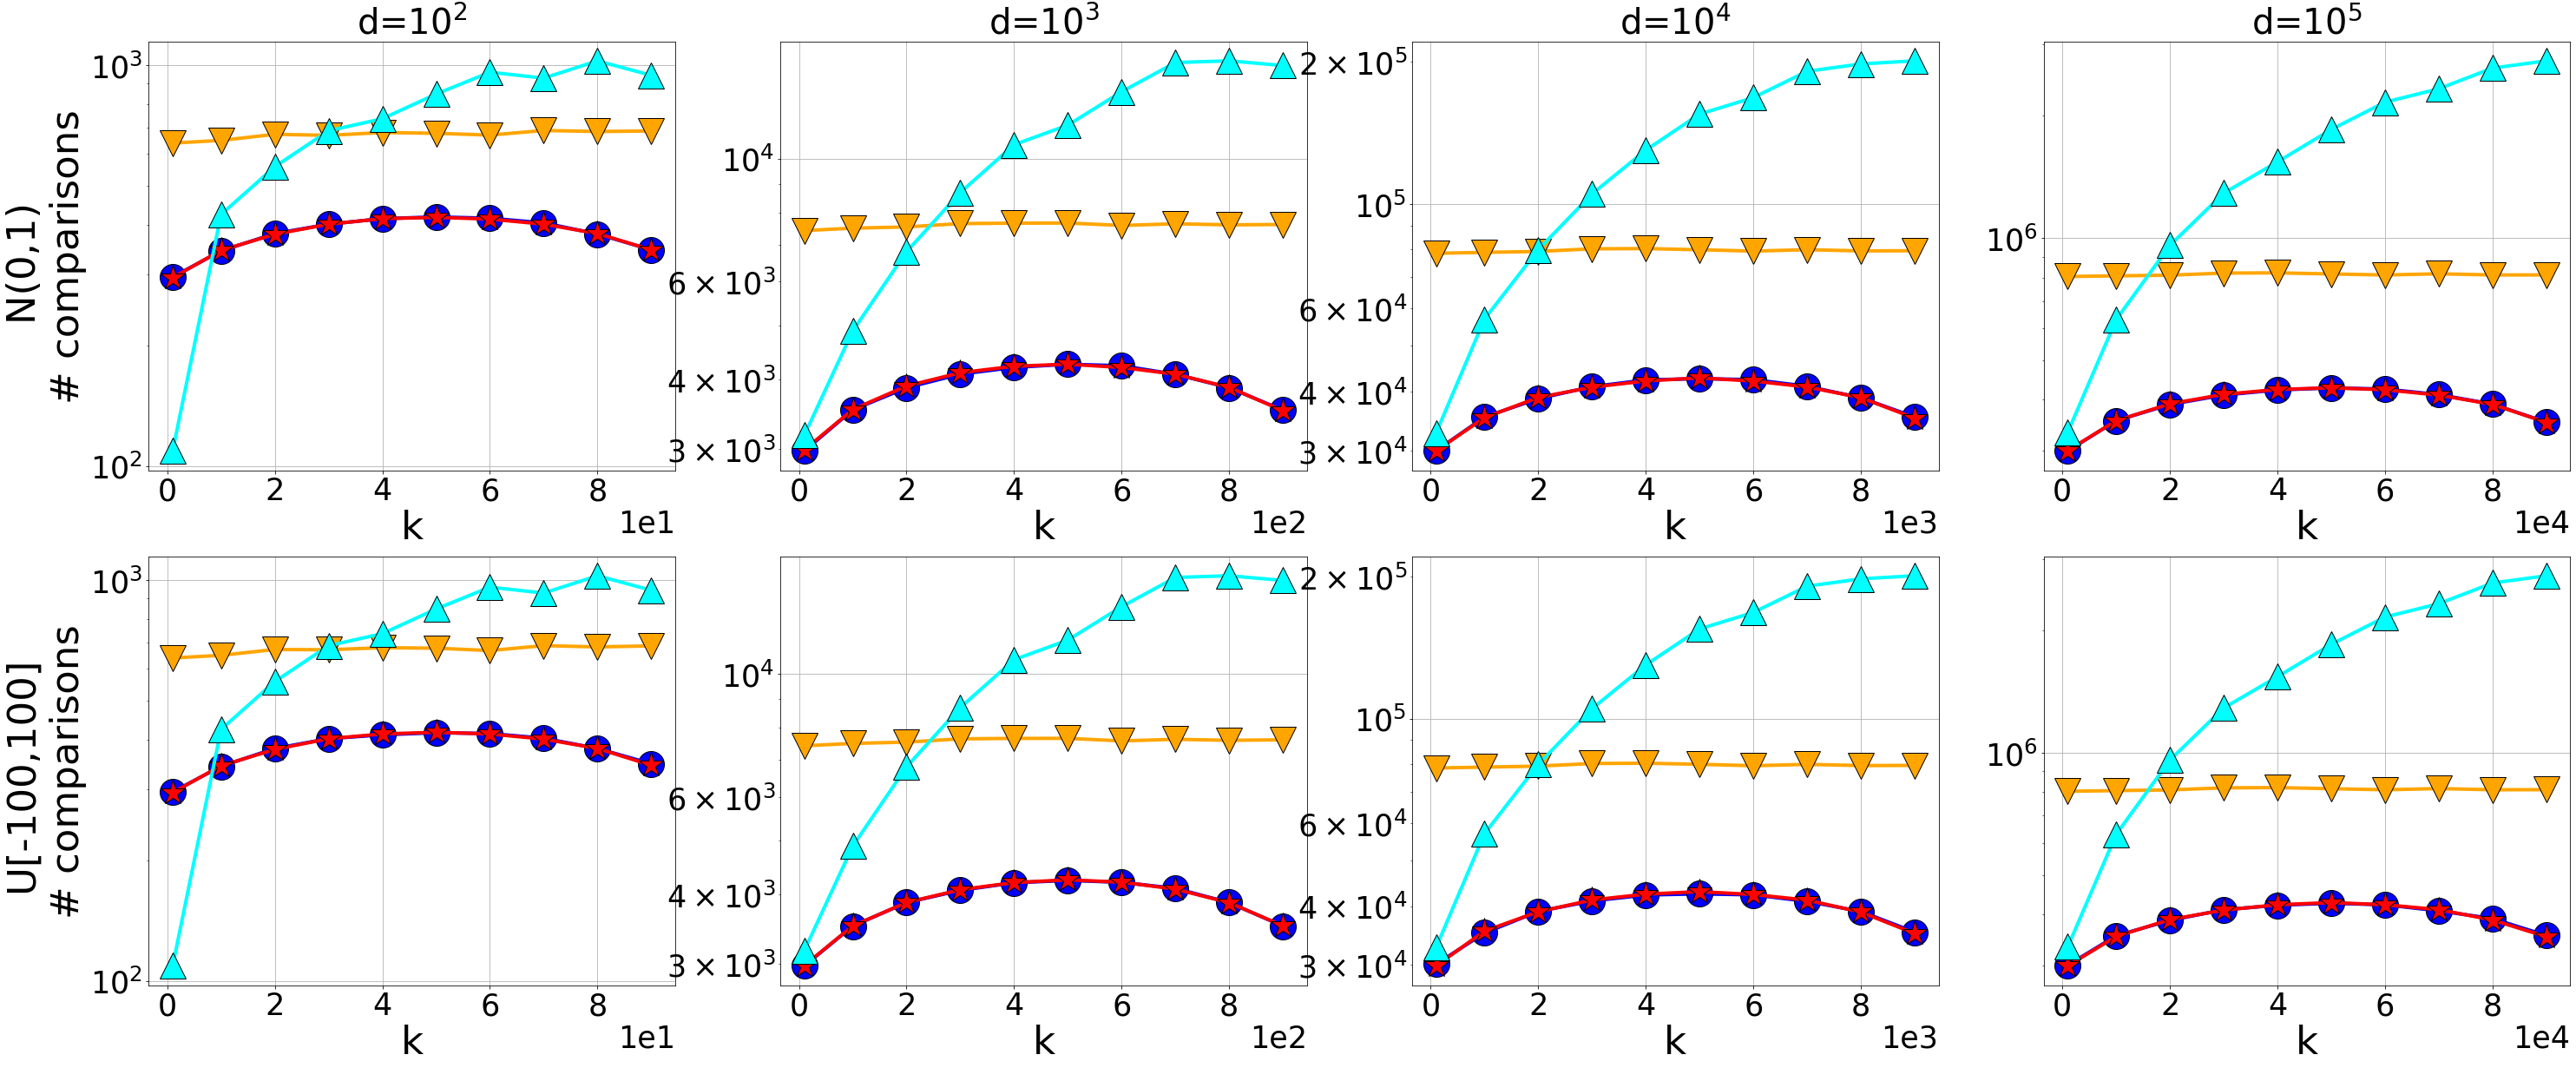

saving is finished!


In [21]:
def draw_medians_and_save(fig_ax_ar, d_ar, distribution_family_ar, plot_path, filename, y_label, x_label, plots_titles, is_legend):
    size = 40
    marker_size = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size-5  # 40
    plt.rcParams['ytick.labelsize'] = size-5  # 40
    plt.rcParams['legend.fontsize'] = 35  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size + 5  # 40
    #if len(dataset_ar)==4:
    plt.rcParams["figure.figsize"] = [50,20]
    #if len(dataset_ar)==1:
    #plt.rcParams["figure.figsize"] = [15,10]
    #plt.rcParams["figure.figsize"] = [70,10]
    
    (fig, axs) = fig_ax_ar
    limits = (0, 1)
    
    if is_legend:
        legend = axs[0,0].legend(loc="best", framealpha=0.5)
    
    for i, distribution_family in enumerate(distribution_family_ar):
        #axs[i,0].set_ylabel(y_label[i])
        axs[i,0].set(ylabel=y_label[i])
        for j,d in enumerate(d_ar):
            axs[0,j].set_title(f"{plots_titles[j]}")#; $n$ = {n_ar[0]}")
            axs[i,j].set(xlabel=x_label)
            #legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
            #legend = axs[dataset_num].legend(loc="upper right", framealpha=0.5)
            #legend = axs[i,j].legend(loc=legend_location[dataset_num], framealpha=0.5)
            axs[i,j].set_yscale('log')
            
            axs[i,j].grid()
            
            #axs[i,j].xaxis.set_major_locator(tck.AutoLocator())
            #axs[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator())
            #axs[i,j].xaxis.set_major_formatter(tck.ScalarFormatter(useMathText=True))
            
            #axs[i,j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
            axs[i,j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
            
            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8), numticks=10)
            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.6,0.8), numticks=5)
            
            #axs[i,j].xaxis.set_minor_locator(locmin)
            #axs[i,j].xaxis.set_minor_formatter(tck.NullFormatter())
            #axs[i,j].set_ylim(limits)
            #print(axs[dataset_num].get_ylim())
    where = plot_path + "_0_" + filename
    fig.savefig(plot_path + "_0_" + filename, bbox_inches='tight')
    plt.show()
    print(f"saving is finished!")

def get_tc_med_ar (k_ar, folder_ar, file_ar):
    tc_med_ar = np.zeros(k_ar.shape)
    for t, (folder,file) in enumerate(zip (folder_ar,file_ar)):
        logs_path = project_path + "logs/logs_{0}/".format(folder)
        logs_file = logs_path + file
        if os.path.isfile(logs_file):
            #print(folder," ",file)
            tc_hist = np.load(logs_file).astype(int)
            tc_med_ar[t] = np.median(tc_hist)
        else:
            print (logs_file + " is not computed")
            #axs[i,j].hist(x=tc_hist, bins=50, density=False, color=color_ar[t], alpha=0.75, label=label)
    return tc_med_ar

color_ar = ['blue', 'red', 'orange', 'aqua', 'violet']+[ 'darkorange','cornflowerblue', 'darkgreen',
                              'coral', 'lime',
                              'darkgreen', 'goldenrod', 'maroon',
                              'black', 'brown', 'yellowgreen', "purple", "violet", "magenta", "green"
                              ]
marker_ar = ["o", "*", "v", "^", "<", ">", "s", "p", "P", "h", "H", "+", "x", "X", "D", "d", "|", "_",1,2,3,4,5,6,7,8,9]
freq = 5
line_style_ar = ['solid', '-.', ':', '--', 'dotted']

project_path = os.getcwd() + "/"
experiment_type = "synthetic"
plot_path = project_path + "plot_{0}/".format(experiment_type)

main_title = "median_comparison"

if main_title == "median_comparison":
    exps = ["tournament","quickselect"]
    distribution_family_ar = ["normal","uniform"]
    pivot_ar = ["random", "deterministic", "median"]

mean = 0.0
sigma = 1.0
left = -100
right = 100
num_plot_points = 10

x_axis = "k"
x_label = x_axis
y_label_ar = ["N({0},{1}) \n".format(intrepr(mean), intrepr(sigma)) + "# comparisons",
              "U[{0},{1}] \n".format(left,right) +"# comparisons"]
n_samples_dict = {"tournament":{10**2:10**5, 10**3:10**5, 10**4:10**4, 10**5:500}, "quickselect":{10**2:10**4, 10**3:10**4, 10**4:10**4, 10**5:10**4}}
d_ar = np.array([10**2, 10**3, 10**4, 10**5], dtype=int)
draw = 1
is_legend = 0
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
        
d_str = {10**2:r"$10^2$", 10**3:r"$10^3$", 10**4:r"$10^4$", 10**5:r"$10^5$",10**6:r"$10^6$", 10**7:r"$10^7$", 10**9:r"$10^9$"}
plots_titles =  list(map (lambda d: r"d="+d_str[d], d_ar))
filename = "{0}_{1}_{2}_{3}.pdf".format(main_title, x_axis, "-".join(exps), "-".join(plots_titles), "-".join(y_label_ar))
k_ar_100 = np.linspace (max(int(0.01*100),1), 100, num_plot_points, endpoint=False, dtype=int)
fig, axs = plt.subplots(len(distribution_family_ar), d_ar.shape[0])


for i, distribution_family in enumerate(distribution_family_ar):
    for j,d in enumerate(d_ar):
        k_ar = k_ar_100 * int(d/100)
        folder_qs_rand_ar, file_qs_rand_ar, label_qs_rand_ar = [],[],[]
        folder_qs_det_ar, file_qs_det_ar, label_qs_det_ar = [],[],[]
        folder_qs_med_ar, file_qs_med_ar, label_qs_med_ar = [],[],[]
        folder_tourn_ar, file_tourn_ar, label_tourn_ar = [],[],[]
        
        if distribution_family == "normal":
            distribution = distribution_family+f"_m-{myrepr(mean)}_s-{myrepr(sigma)}"
            folder_qs_rand_ar = ['{0}_{1}'.format(experiment_type, "quickselect-random") for k in k_ar]
            file_qs_rand_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, k) for k in k_ar]
            label_qs_rand_ar = ["quickselect; {0}".format("random")]
            
            folder_qs_det_ar = ['{0}_{1}'.format(experiment_type, "quickselect-deterministic") for k in k_ar]
            file_qs_det_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, k) for k in k_ar]
            label_qs_det_ar = ["quickselect; {0}".format("deterministic")]
            
            folder_qs_med_ar = ['{0}_{1}'.format(experiment_type, "quickselect-median") for k in k_ar]
            file_qs_med_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, k) for k in k_ar]
            label_qs_med_ar = ["quickselect; {0}".format("median")]
            
            folder_tourn_ar = ['{0}_{1}'.format(experiment_type, f"tournament") for k in k_ar]
            file_tourn_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["tournament"][d], d, k) for k in k_ar]
            label_tourn_ar = ["tournament"]
            
            
        elif distribution_family == "uniform":
            distribution = distribution_family+f"_l-{myrepr(left)}_r-{myrepr(right)}"
            
            folder_qs_rand_ar = ['{0}_{1}'.format(experiment_type, "quickselect-random") for k in k_ar]
            file_qs_rand_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, k) for k in k_ar]
            label_qs_rand_ar = ["quickselect; {0}".format("random")]
            
            folder_qs_det_ar = ['{0}_{1}'.format(experiment_type, "quickselect-deterministic") for k in k_ar]
            file_qs_det_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, k) for k in k_ar]
            label_qs_det_ar = ["quickselect; {0}".format("deterministic")]
                       
            folder_qs_med_ar = ['{0}_{1}'.format(experiment_type, "quickselect-median") for k in k_ar]
            file_qs_med_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, k) for k in k_ar]
            label_qs_med_ar = ["quickselect; {0}".format("median")]
                        
            folder_tourn_ar = ['{0}_{1}'.format(experiment_type, f"tournament") for k in k_ar]
            file_tourn_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["tournament"][d], d, k) for k in k_ar]
            label_tourn_ar = ["tournament"]
        else:
            raise ValueError("wrong distribution")
        
        
        tc_qs_rand_ar = get_tc_med_ar (k_ar, folder_qs_rand_ar, file_qs_rand_ar)
        tc_qs_det_ar = get_tc_med_ar (k_ar, folder_qs_det_ar, file_qs_det_ar)
        tc_qs_med_ar = get_tc_med_ar (k_ar, folder_qs_med_ar, file_qs_med_ar)
        tc_qs_tourn_ar = get_tc_med_ar (k_ar, folder_tourn_ar, file_tourn_ar)
        
        all_tc_ar = [tc_qs_rand_ar, tc_qs_det_ar, tc_qs_med_ar, tc_qs_tourn_ar]
        #all_tc_ar = [tc_qs_rand_ar, tc_qs_det_ar, tc_qs_med_ar]


        all_labels_ar = label_qs_rand_ar + label_qs_det_ar + label_qs_med_ar + label_tourn_ar
        #all_labels_ar = label_qs_rand_ar + label_qs_det_ar + label_qs_med_ar

        for tc_ar, label, color, marker in zip(all_tc_ar, all_labels_ar, color_ar, marker_ar):
            axs[i,j].plot(k_ar, tc_ar, label=label, color=color, ls = line_style_ar[0], marker=marker, ms = 30, markerfacecolor=color, markeredgecolor = 'black')
        
        
    #raise ValueError("")

if draw:
    fig_ax_ar = (fig, axs)
    draw_medians_and_save(fig_ax_ar, d_ar, distribution_family_ar, plot_path, filename, y_label_ar, x_label, plots_titles, is_legend)

## k is fixed

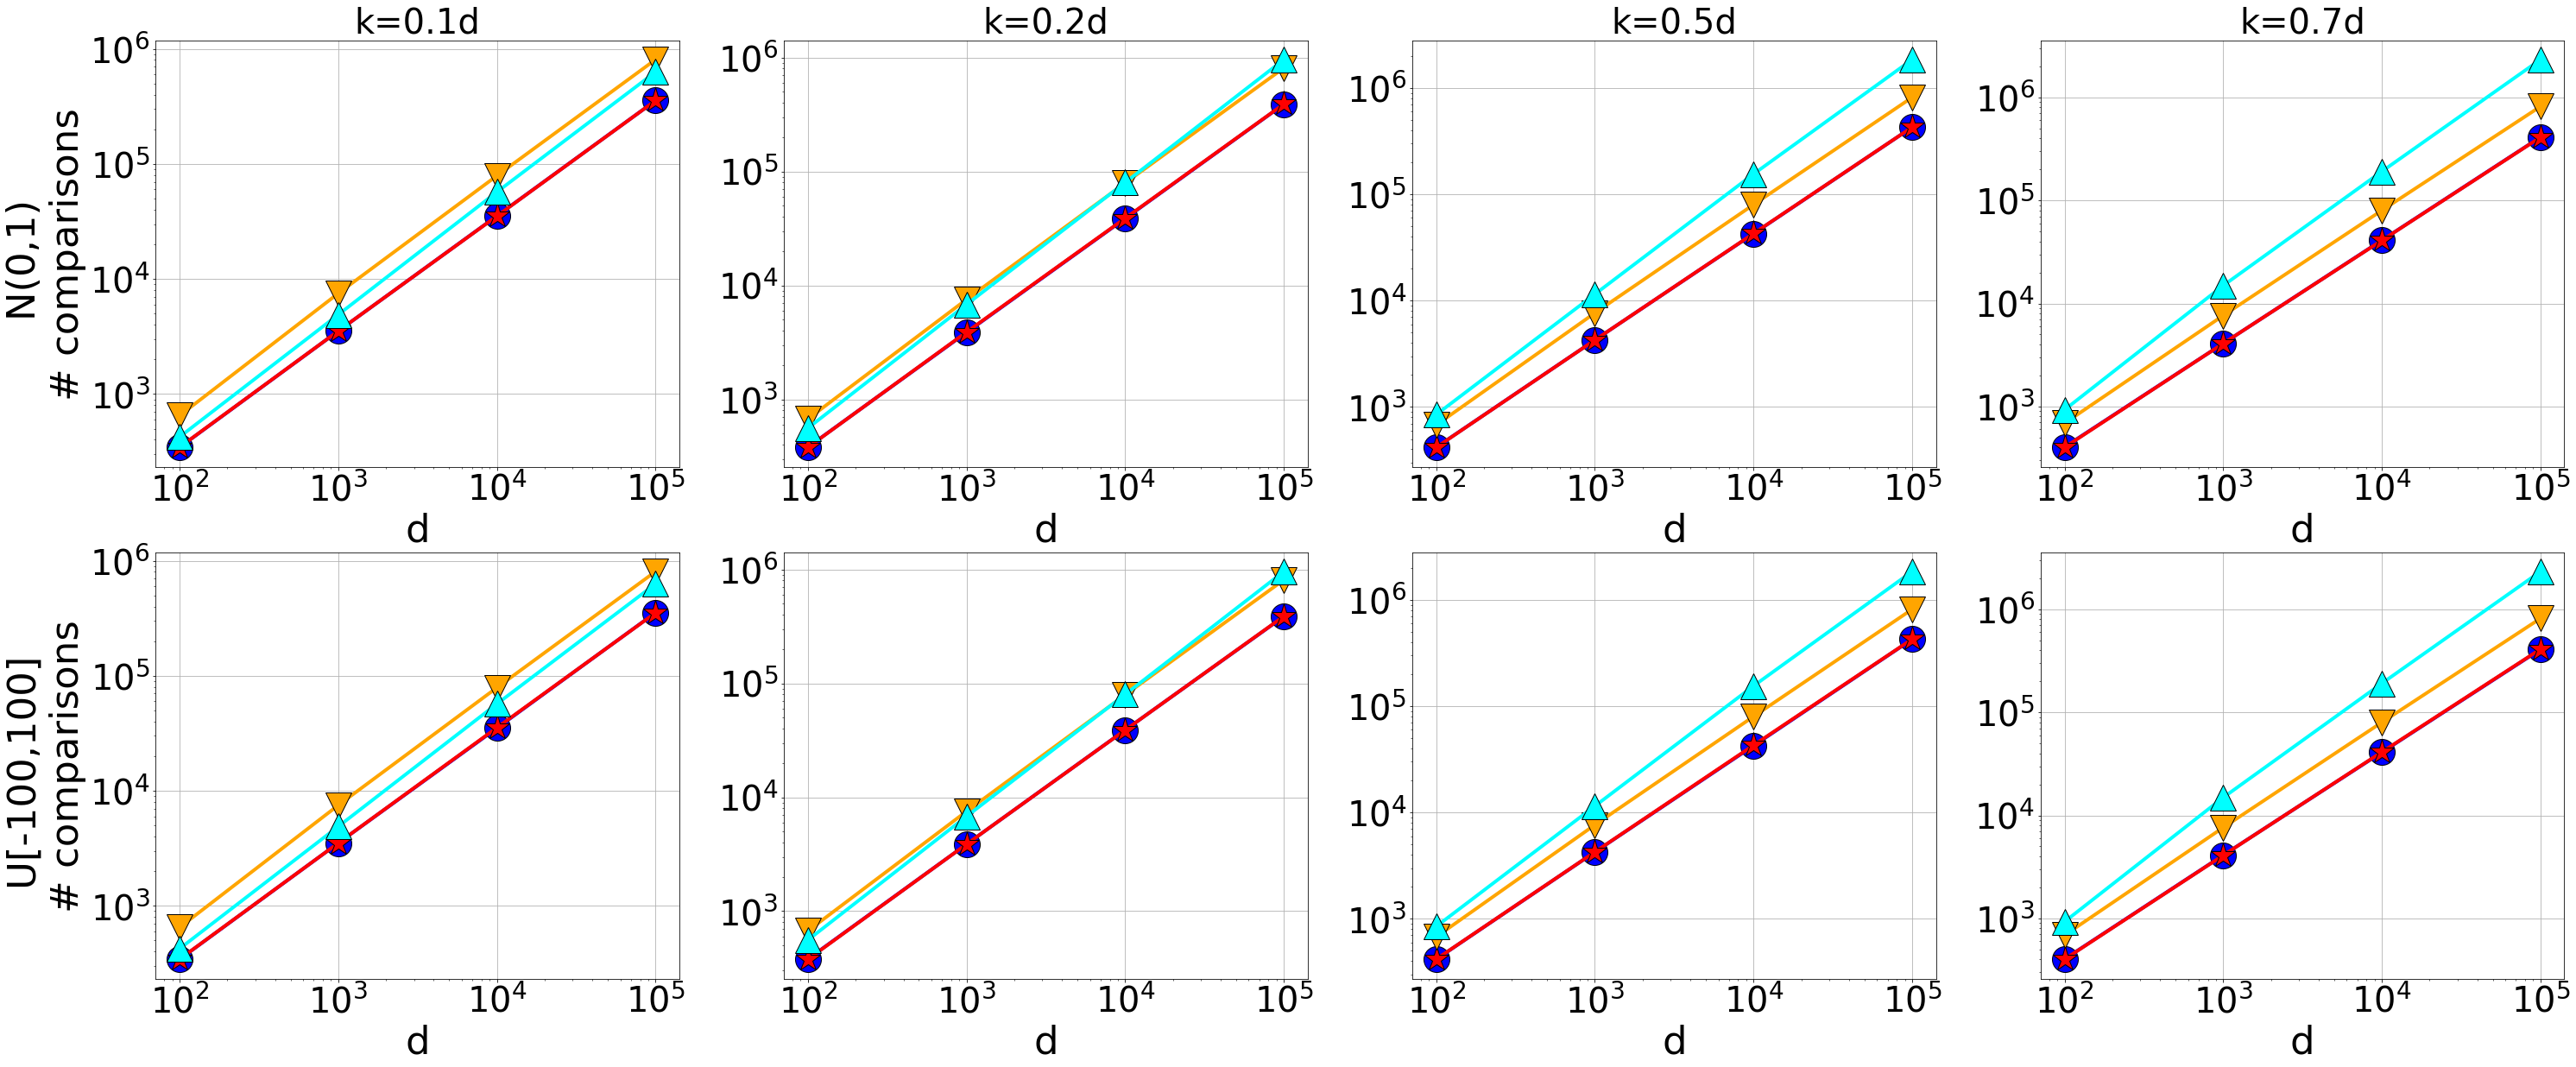

saving is finished!


In [24]:
def draw_medians_and_save(fig_ax_ar, d_ar, distribution_family_ar, plot_path, filename, y_label, x_label, plots_titles, is_legend):
    size = 40
    marker_size = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = 35  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size + 5  # 40
    #if len(dataset_ar)==4:
    plt.rcParams["figure.figsize"] = [50,20]
    #if len(dataset_ar)==1:
    #plt.rcParams["figure.figsize"] = [15,10]
    #plt.rcParams["figure.figsize"] = [70,10]
            
    (fig, axs) = fig_ax_ar
    limits = (0, 1)
    
    if is_legend:
        legend = axs[0,0].legend(loc="best", framealpha=0.5)

    for i, distribution_family in enumerate(distribution_family_ar):
        #axs[i,0].set_ylabel(y_label[i])
        axs[i,0].set(ylabel=y_label[i])
        for j,d in enumerate(d_ar):
            axs[0,j].set_title(f"{plots_titles[j]}")#; $n$ = {n_ar[0]}")
            axs[i,j].set(xlabel=x_label)
            #legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
            #legend = axs[dataset_num].legend(loc="upper right", framealpha=0.5)
            #legend = axs[i,j].legend(loc=legend_location[dataset_num], framealpha=0.5)
            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
            axs[i,j].grid()
            
            
            #axs[i,j].xaxis.set_major_locator(tck.AutoLocator())
            #axs[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator())
            #axs[i,j].xaxis.set_major_formatter(tck.ScalarFormatter(useMathText=True))
            
            #axs[i,j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
            #axs[i,j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
            
            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8), numticks=10)
            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.6,0.8), numticks=5)
            
            #axs[i,j].xaxis.set_minor_locator(locmin)
            #axs[i,j].xaxis.set_minor_formatter(tck.NullFormatter())
            #axs[i,j].set_ylim(limits)
            #print(axs[dataset_num].get_ylim())
    where = plot_path + "_0_" + filename
    fig.savefig(plot_path + "_0_" + filename, bbox_inches='tight')
    plt.show()
    print(f"saving is finished!")

def get_tc_med_ar (d_ar, folder_ar, file_ar):
    tc_med_ar = np.zeros(d_ar.shape)
    for t, (folder,file) in enumerate(zip (folder_ar,file_ar)):
        logs_path = project_path + "logs/logs_{0}/".format(folder)
        logs_file = logs_path + file
        if os.path.isfile(logs_file):
            #print(folder," ",file)
            tc_hist = np.load(logs_file).astype(int)
            tc_med_ar[t] = np.median(tc_hist)
        else:
            print (logs_file + " is not computed")
    return tc_med_ar

color_ar = ['blue', 'red', 'orange', 'aqua', 'violet']+[ 'darkorange','cornflowerblue', 'darkgreen',
                              'coral', 'lime',
                              'darkgreen', 'goldenrod', 'maroon',
                              'black', 'brown', 'yellowgreen', "purple", "violet", "magenta", "green"
                              ]
marker_ar = ["o", "*", "v", "^", "<", ">", "s", "p", "P", "h", "H", "+", "x", "X", "D", "d", "|", "_",1,2,3,4,5,6,7,8,9]
freq = 5
line_style_ar = ['solid', '-.', ':', '--', 'dotted']

project_path = os.getcwd() + "/"
experiment_type = "synthetic"
plot_path = project_path + "plot_{0}/".format(experiment_type)

main_title = "median_comparison"

if main_title == "median_comparison":
    exps = ["tournament","quickselect"]
    distribution_family_ar = ["normal","uniform"]
    pivot_ar = ["random", "deterministic", "median"]

mean = 0.0
sigma = 1.0
left = -100
right = 100
num_plot_points = 10

x_axis = "d"
x_label = x_axis
y_label_ar = ["N({0},{1}) \n".format(intrepr(mean), intrepr(sigma)) + "# comparisons",
              "U[{0},{1}] \n".format(left,right) +"# comparisons"]
n_samples_dict = {"tournament":{10**2:10**5, 10**3:10**5, 10**4:10**4, 10**5:500}, "quickselect":{10**2:10**4, 10**3:10**4, 10**4:10**4, 10**5:10**4}}
d_ar = np.array([10**2, 10**3, 10**4, 10**5], dtype=int)
k_frac_ar =  np.array([0.1,0.2,0.5,0.7])

draw = 1
is_legend = 0

if not os.path.exists(plot_path):
    os.makedirs(plot_path)
        
d_str = {10**2:r"$10^2$", 10**3:r"$10^3$", 10**4:r"$10^4$", 10**5:r"$10^5$",10**6:r"$10^6$", 10**7:r"$10^7$", 10**9:r"$10^9$"}

plots_titles =  list(map (lambda k_frac: f"k={k_frac}d", k_frac_ar))

filename = "{0}_{1}_{2}_{3}.pdf".format(main_title, x_axis, "-".join(exps), "-".join(plots_titles), "-".join(y_label_ar))

fig, axs = plt.subplots(len(distribution_family_ar), d_ar.shape[0])


for i, distribution_family in enumerate(distribution_family_ar):
    for j, k_frac in enumerate(k_frac_ar):
        folder_qs_rand_ar, file_qs_rand_ar, label_qs_rand_ar = [],[],[]
        folder_qs_det_ar, file_qs_det_ar, label_qs_det_ar = [],[],[]
        folder_qs_med_ar, file_qs_med_ar, label_qs_med_ar = [],[],[]
        folder_tourn_ar, file_tourn_ar, label_tourn_ar = [],[],[]
        
        if distribution_family == "normal":
            distribution = distribution_family+f"_m-{myrepr(mean)}_s-{myrepr(sigma)}"
            folder_qs_rand_ar = ['{0}_{1}'.format(experiment_type, "quickselect-random") for d in d_ar]
            file_qs_rand_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, int(k_frac*d)) for d in d_ar]
            label_qs_rand_ar = ["quickselect; {0}".format("random")]
            
            folder_qs_det_ar = ['{0}_{1}'.format(experiment_type, "quickselect-deterministic") for d in d_ar]
            file_qs_det_ar = file_qs_rand_ar
            label_qs_det_ar = ["quickselect; {0}".format("deterministic")]
            
            folder_qs_med_ar = ['{0}_{1}'.format(experiment_type, "quickselect-median") for d in d_ar]
            file_qs_med_ar = file_qs_rand_ar
            label_qs_med_ar = ["quickselect; {0}".format("median")]
            
            folder_tourn_ar = ['{0}_{1}'.format(experiment_type, f"tournament") for d in d_ar]
            file_tourn_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["tournament"][d], d, int(k_frac*d)) for d in d_ar]
            label_tourn_ar = ["tournament"]
            
            
        elif distribution_family == "uniform":
            distribution = distribution_family+f"_l-{myrepr(left)}_r-{myrepr(right)}"
            
            folder_qs_rand_ar = ['{0}_{1}'.format(experiment_type, "quickselect-random") for d in d_ar]
            file_qs_rand_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["quickselect"][d], d, int(k_frac*d)) for d in d_ar]
            label_qs_rand_ar = ["quickselect; {0}".format("random")]
            
            folder_qs_det_ar = ['{0}_{1}'.format(experiment_type, "quickselect-deterministic") for d in d_ar]
            file_qs_det_ar = file_qs_rand_ar
            label_qs_det_ar = ["quickselect; {0}".format("deterministic")]
                       
            folder_qs_med_ar = ['{0}_{1}'.format(experiment_type, "quickselect-median") for d in d_ar]
            file_qs_med_ar = file_qs_rand_ar
            label_qs_med_ar = ["quickselect; {0}".format("median")]
                        
            folder_tourn_ar = ['{0}_{1}'.format(experiment_type, f"tournament") for d in d_ar]
            file_tourn_ar = ['TCH_prior-{0}_n-{1}_d-{2}_k-{3}.npy'.format(distribution, n_samples_dict["tournament"][d], d, int(k_frac*d)) for d in d_ar]
            label_tourn_ar = ["tournament"]
        else:
            raise ValueError("wrong distribution")
        
        
        tc_qs_rand_ar = get_tc_med_ar (d_ar, folder_qs_rand_ar, file_qs_rand_ar)
        tc_qs_det_ar = get_tc_med_ar (d_ar, folder_qs_det_ar, file_qs_det_ar)
        tc_qs_med_ar = get_tc_med_ar (d_ar, folder_qs_med_ar, file_qs_med_ar)
        tc_qs_tourn_ar = get_tc_med_ar (d_ar, folder_tourn_ar, file_tourn_ar)

        all_tc_ar = [tc_qs_rand_ar, tc_qs_det_ar, tc_qs_med_ar, tc_qs_tourn_ar]
        all_labels_ar = label_qs_rand_ar + label_qs_det_ar + label_qs_med_ar + label_tourn_ar
        
        for tc_ar, label, color, marker in zip(all_tc_ar, all_labels_ar, color_ar, marker_ar):
            axs[i,j].plot(d_ar, tc_ar, label=label, color=color, ls = line_style_ar[0], marker=marker, ms = 30, markerfacecolor=color, markeredgecolor = 'black')
        
        
    #raise ValueError("")

if draw:
    fig_ax_ar = (fig, axs)
    draw_medians_and_save(fig_ax_ar, d_ar, distribution_family_ar, plot_path, filename, y_label_ar, x_label, plots_titles,is_legend)

# real experiments


 MIN:                          EF21; 64x iter:     1010; norms:  9.44e-08  bits/n:     1009 

Num exps:  1

 MIN:                          EF21; 32x iter:      187; norms:  5.16e-08  bits/n:      186 

Num exps:  1

 MIN:                          EF21; 32x iter:       72; norms:  1.42e-08  bits/n:       71 

Num exps:  1

 MIN:                          EF21; 16x iter:       59; norms:  5.28e-08  bits/n:       58 

Num exps:  1
saving to: /home/fatkhui/FALL2021_CS_260_project/plot_all-datasets/_0_w8a_comparison_per_k_iteration_comm_ef21_fg.pdf...


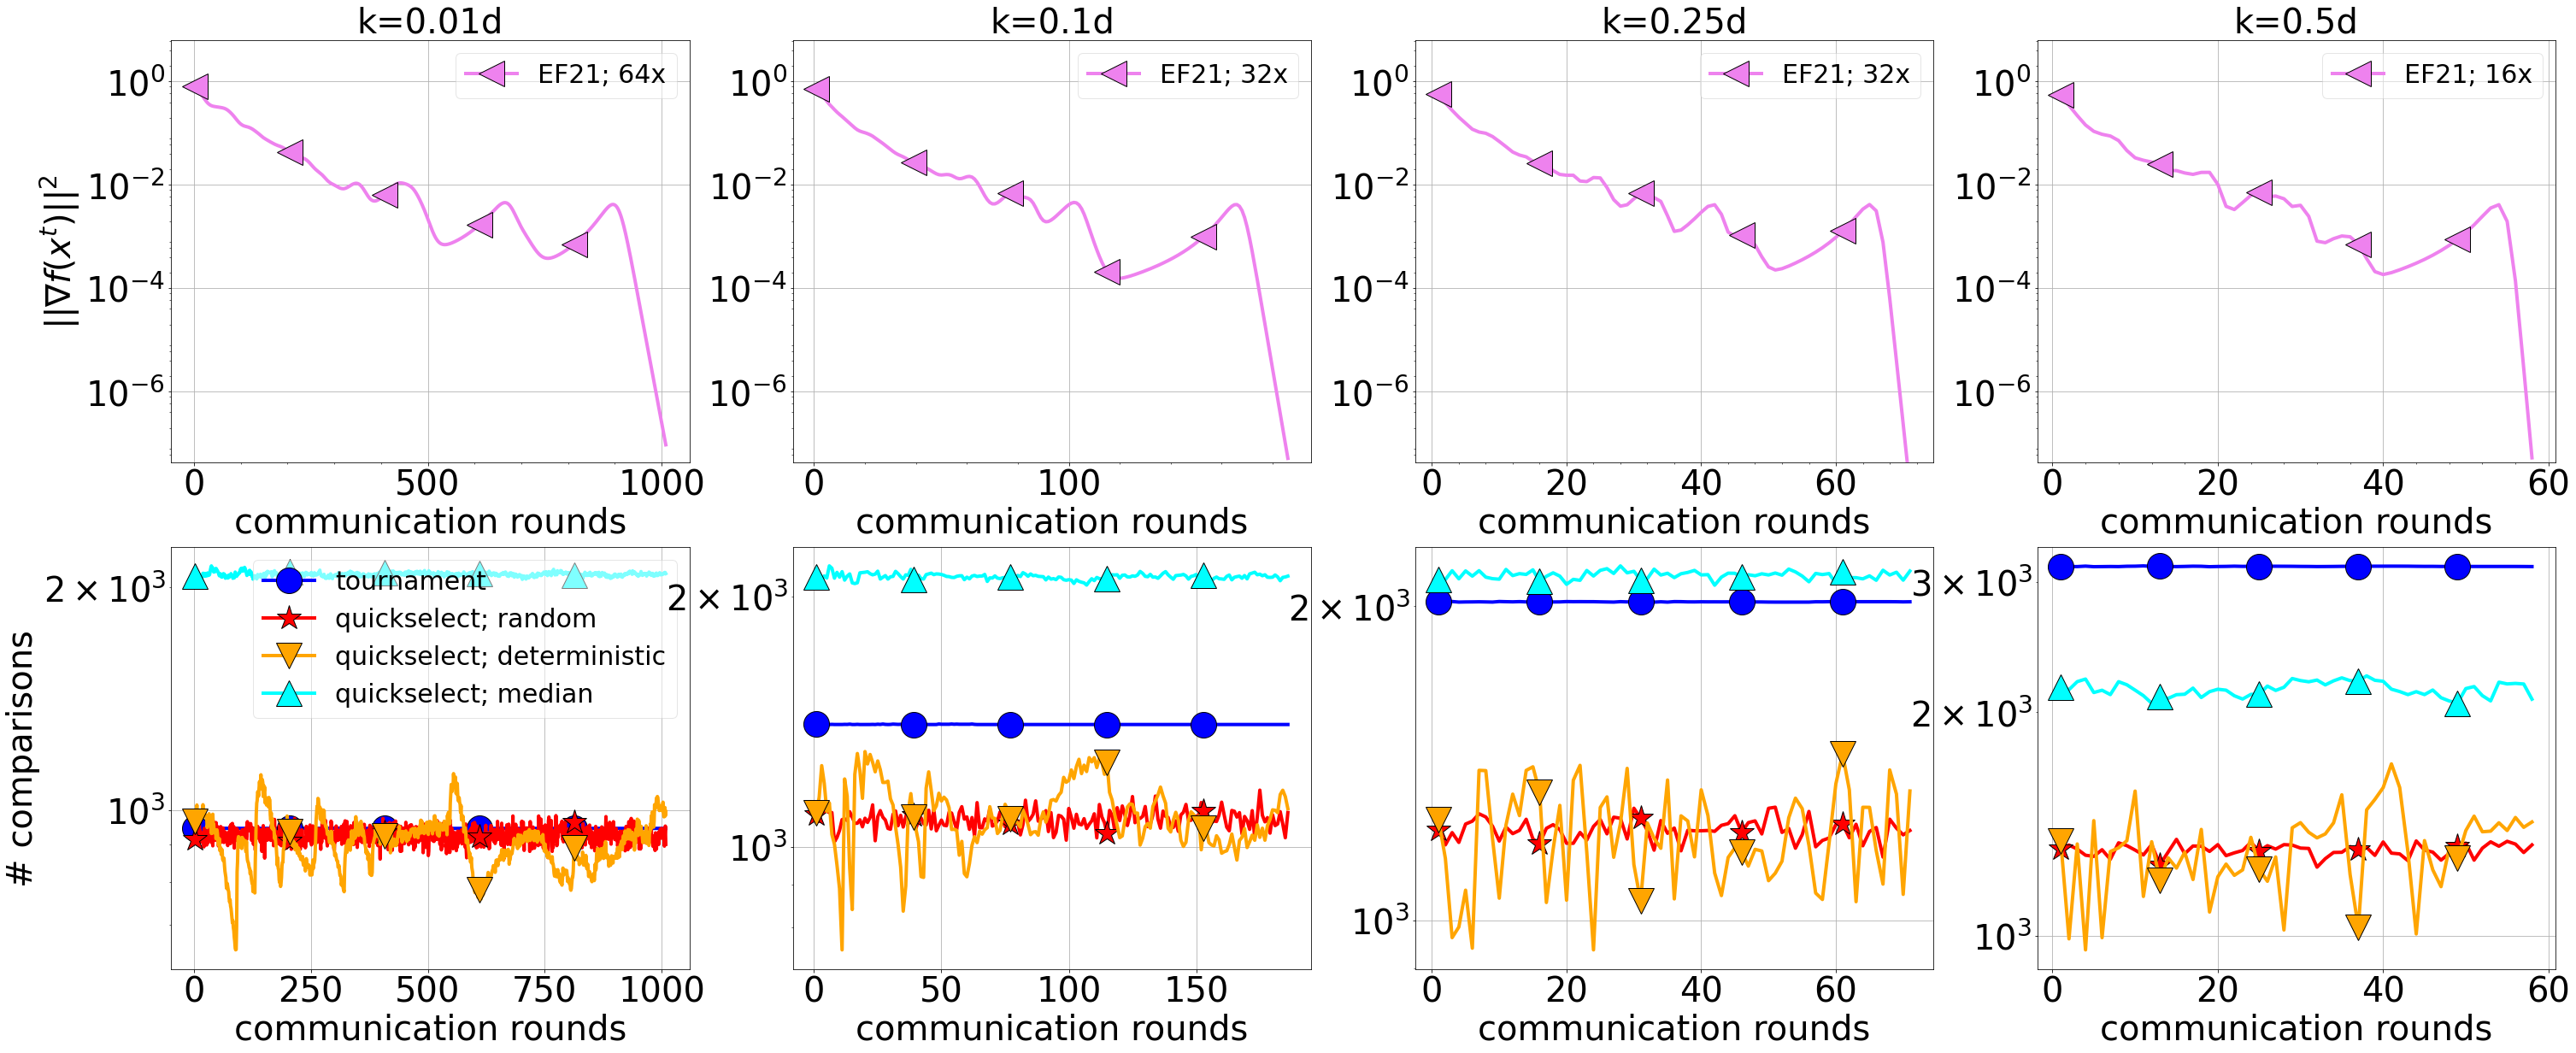

saving is finished!

 MIN:                         EF21; 128x iter:      908; norms:  9.82e-08  bits/n:      907 

Num exps:  1

 MIN:                          EF21; 64x iter:      326; norms:  8.74e-08  bits/n:      325 

Num exps:  1

 MIN:                          EF21; 16x iter:      113; norms:  5.86e-08  bits/n:      112 

Num exps:  1

 MIN:                           EF21; 8x iter:      102; norms:  5.76e-08  bits/n:      101 

Num exps:  1
saving to: /home/fatkhui/FALL2021_CS_260_project/plot_all-datasets/_0_a9a_comparison_per_k_iteration_comm_ef21_fg.pdf...


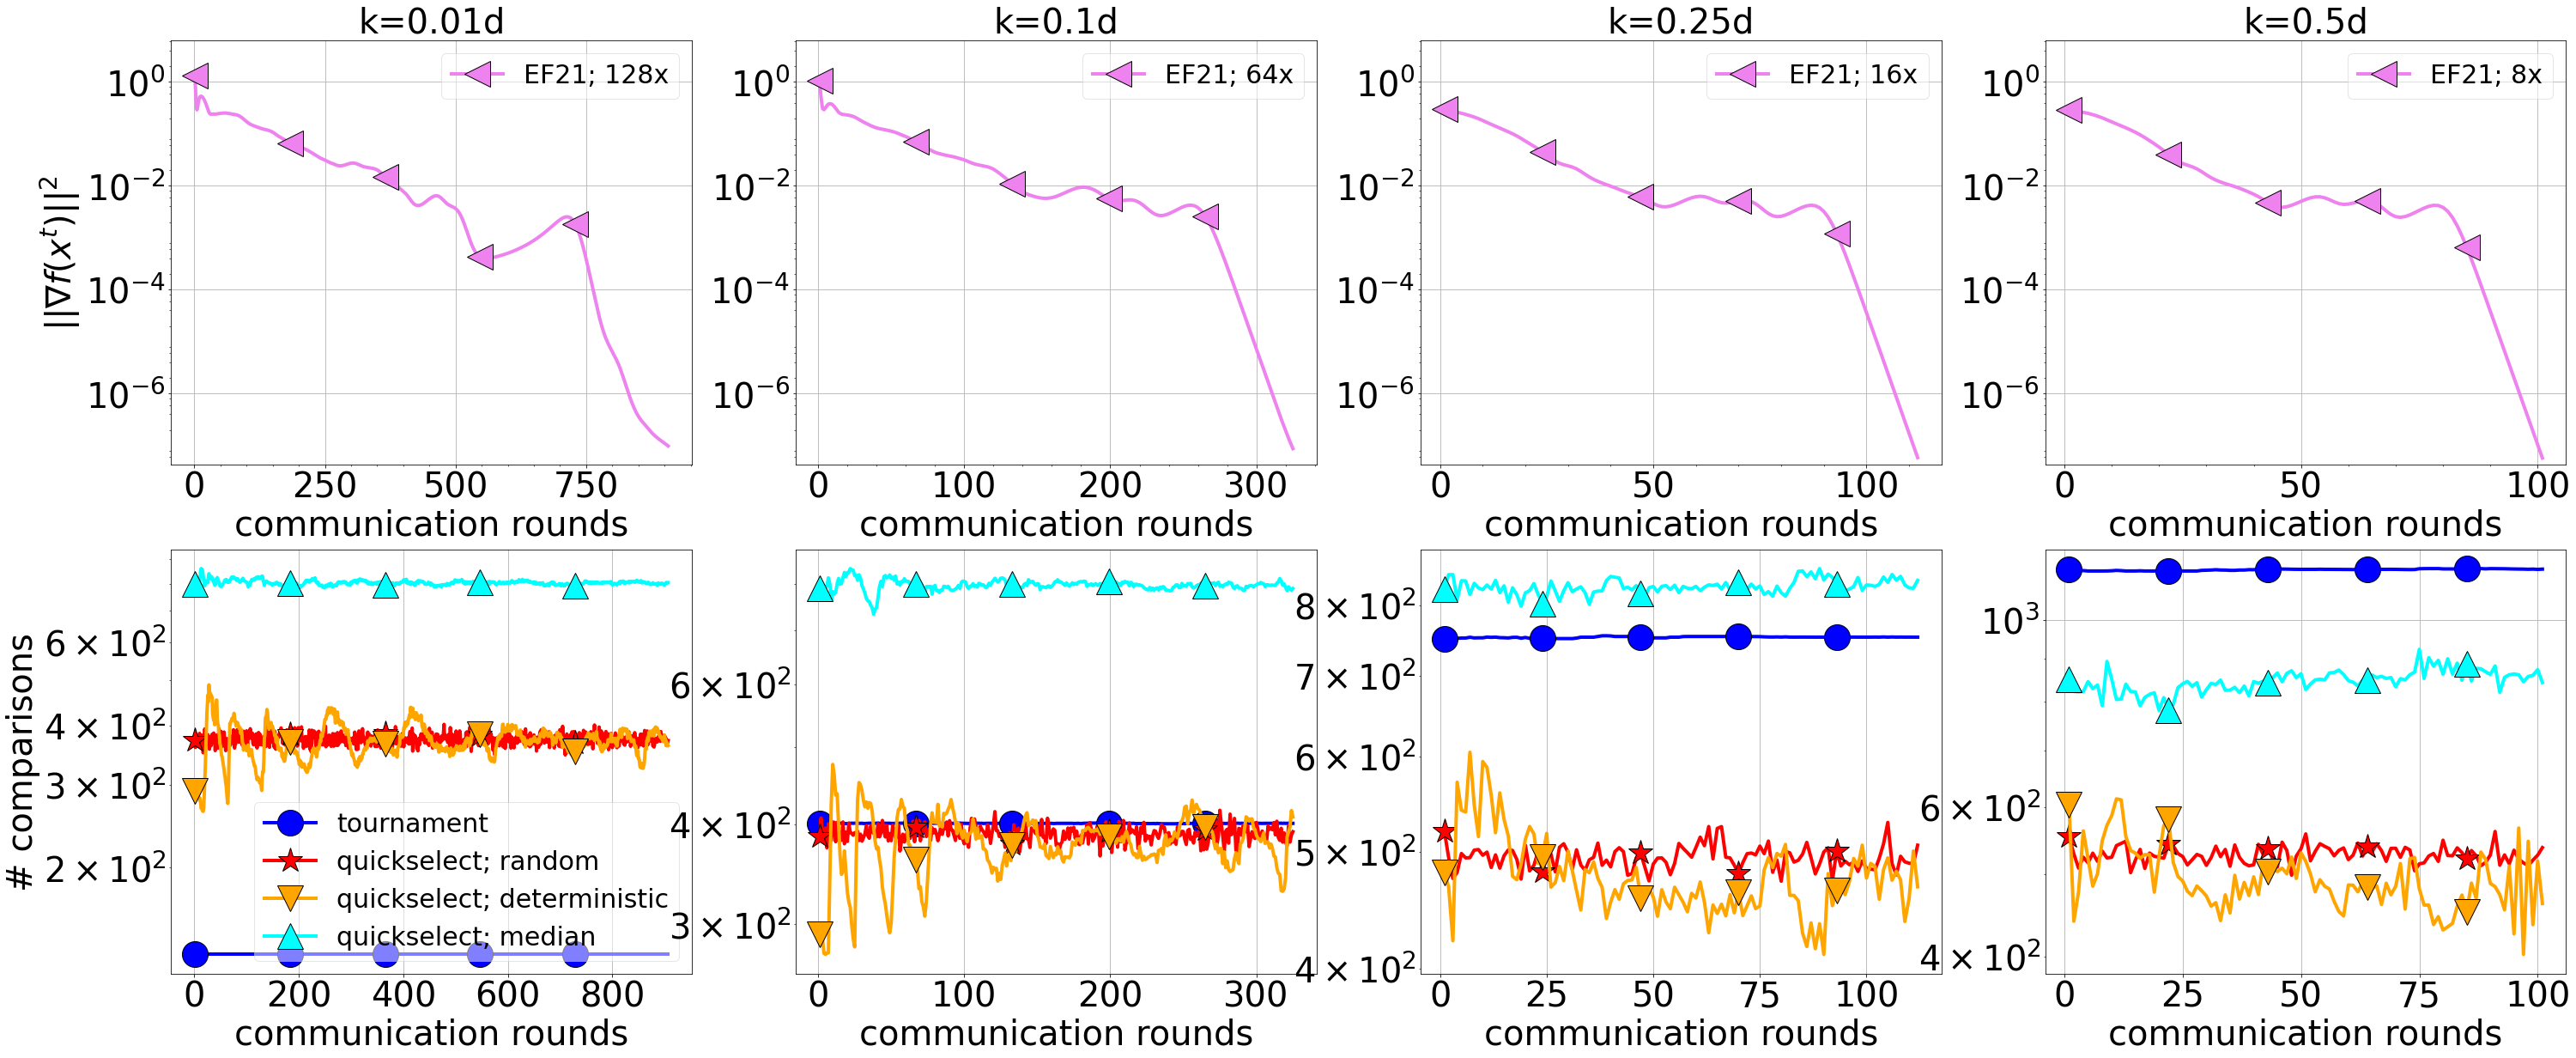

saving is finished!


In [9]:
myrepr = lambda x: repr(round(x, 4)).replace('.',',') if isinstance(x, float) else repr(x) #for some methods we used diffrent rounding
intrepr = lambda x: int(x) if x.is_integer() else round(x,4) 
########################################
## LOGS UPLOADER (BY GIVEN EXPS_STRS) ##
########################################
def upload_logs (dataset, experiment_ar, label_ar, x_axis, y_axis, ub_x_axis):
    its_last_value = np.zeros(len(experiment_ar))
    its_ar = []
    norms_ar = []
    for i, experiment in enumerate(experiment_ar):
        logs_path = project_path + "logs/logs_{0}_{1}/".format(dataset, experiment)
        #temporary fix for sgd exp
        logs_file_its = logs_path + x_axis + "_" + experiment + ".npy"
        if os.path.isfile(logs_file_its):
            its = np.load(logs_file_its)  
            if len (its.shape)==2:
                if its.shape[0] ==1:
                    its = its.flatten()
                else: 
                    raise ValueError("wrong shape")
            number_its = len(its[its < ub_x_axis[dataset]])
            its_ar.append(its[:number_its])
            #its_ar.append(its)
            norms = np.load(logs_path + y_axis + '_' + experiment+'.npy')
            if len (norms.shape)==2:
                if norms.shape[0]==1:
                    norms = norms.flatten()
                else: 
                    raise ValueError("wrong shape")
            norms_ar.append(norms[:number_its])
            #norms_ar.append(norms)
            
            its_last_value[i] = its_ar[-1][-1]
        else: 
            print (logs_path +" "+ experiment+" is not computed")
        if print_each_exp:
            print ("%34s iter: %8d; norms: %9.2e  bits/n: %8d"%(label_ar[i], its_ar[-1].shape[0], norms_ar[-1][-1], its_ar[-1][-1]) )        
    it_min = np.argmin (its_last_value)
    print (f"\n MIN: " + "%34s iter: %8d; norms: %9.2e  bits/n: %8d \n"%(label_ar[it_min], its_ar[it_min].shape[0], norms_ar[it_min][-1], its_last_value[it_min]))
    print ("Num exps: ",len(label_ar))
    return its_ar, norms_ar 

#############################################
##  EXPS_STRS GENERATORS (BY GIVEN PARAMS) ##
#############################################

def ef21_fg_exp_label(n_ar, ef21_fg_dict, main_title):
    ef21_fg_k_ar, ef21_fg_factor_ar = ef21_fg_dict["k"], ef21_fg_dict["factor"]
    exp_ef21_fg_ar = ["biased-diana-full-grad_nw-{0}_{1}x_{2}".format(n, ef21_fg_factor, k) for n, k, ef21_fg_factor in itertools.product(n_ar, ef21_fg_k_ar, ef21_fg_factor_ar)]
    label_ef21_fg_ar = {"comparison_best":["EF21; Top-{0}; {1}x".format(k, ef21_fg_factor) for n, k, ef21_fg_factor in itertools.product(n_ar, ef21_fg_k_ar, ef21_fg_factor_ar)],
                        "comparison_per_k":["EF21; {0}x".format(ef21_fg_factor) for n, k, ef21_fg_factor in itertools.product(n_ar, ef21_fg_k_ar, ef21_fg_factor_ar)]}[main_title]
    return exp_ef21_fg_ar, label_ef21_fg_ar

    
exp_and_label_list_from_dict = {"ef21_fg":   lambda n_ar, ef21_fg_dict, main_title:   ef21_fg_exp_label(n_ar, ef21_fg_dict, main_title)} 

def set_best_params_grouped_by_param(dataset, n, exp_name, param_value):
    #done
    ef21_fg_bpt = {"w8a":{ 20:{2:{'k': [2],  'factor': [64]} }, 100:{ 2:{'k': [2], 'factor': [64]},
                                                                      3:{'k': [3], 'factor': [64]},
                                                                      30:{'k': [30], 'factor': [32]},
                                                                      75:{'k': [75], 'factor': [32]},
                                                                      150:{'k': [150], 'factor': [16]} }},
                   "a9a":{ 20:{2:{'k': [2],  'factor': [64]} }, 100:{ 2:{'k': [2],  'factor': [128]},
                                                                      1:{'k': [1],  'factor': [128]},
                                                                      3:{'k': [3],  'factor': [64]},
                                                                      30:{'k': [30],  'factor': [16]},
                                                                      60:{'k': [60],  'factor': [8]},
                                                                    }}
    }
    
    
    opt_dict = {"ef21_fg":   lambda dataset, n, param_value: ef21_fg_bpt[dataset][n][param_value]}

    return opt_dict[exp_name](dataset, n, param_value)

def sub_dict (dct, keys ):
    return { k:v for k,v in dct.items() if k in keys }

def set_params (dataset, n_ar, exp_subdict, main_title): 
    n = n_ar[0]
    all_exps_ar = []
    all_labels_ar = []
    #
    for exp_name, exp_dict in exp_subdict.items():
        exp_ar, label_ar = [],[]
        #print(f"exp_dict: {exp_subdict} \n")
        if best_params:
            if len(exp_dict["fixed_params"])==0:
                exp_dict_best = set_best_params_total(dataset, n, exp_name)
                exp_ar, label_ar = exp_and_label_list_from_dict[exp_name] (n_ar, exp_dict_best, main_title)
                
            elif len(exp_dict["fixed_params"])==1:
                fixed_param_str = exp_dict["fixed_params"][0]      
                for param_value in exp_dict[fixed_param_str]:
                    exp_dict_best_per_param = set_best_params_grouped_by_param(dataset, n, exp_name, param_value)
                    exp_temp_ar, label_temp_ar = exp_and_label_list_from_dict[exp_name](n_ar, exp_dict_best_per_param, main_title)
                    exp_ar += exp_temp_ar
                    label_ar += label_temp_ar
            else:
                raise ValueError("not implemented yet")
        else:
            raise ValueError("not implemented yet")
        all_exps_ar += exp_ar
        all_labels_ar += label_ar
        
    return all_exps_ar, all_labels_ar

#backup
def draw_axis_and_safe(fig_ax_ar, k_frac_ar, plot_path, filename, x_label, y_title_ar, plots_titles, legend_location):
    size = 40
    marker_size = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = 30  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40

    plt.rcParams["figure.figsize"] = [50,20]

    #plt.rcParams["figure.figsize"] = [70,10]
    
    (fig, axs) = fig_ax_ar

    limits = [  (4.34428465891723e-08, 6.416193077774576),
                (4.34428465891723e-08, 6.416193077774576),
                (4.34428465891723e-08, 6.416193077774576),
                (4.34428465891723e-08, 6.416193077774576)]

    for i in range (len(y_title_ar)):
        axs[i,0].set(ylabel=y_title_ar[i])
        for j, k_frac in enumerate(k_frac_ar):
            if i == 0:
                axs[0,j].set_title(f"{plots_titles[j]}")#; $n$ = {n_ar[0]}")
                axs[i,j].set(xlabel=x_label)
                axs[i,j].set_yscale('log')
                legend = axs[i,j].legend(loc="best", framealpha=0.5)
                axs[i,j].grid()
                axs[i,j].locator_params(axis='x', nbins=4)
                axs[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator(5))
                locmin = tck.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
                axs[i,j].yaxis.set_minor_locator(locmin)
                axs[i,j].yaxis.set_minor_formatter(tck.NullFormatter())
                axs[i,j].set_ylim(limits[j])
            elif i==1:
                axs[i,j].set(xlabel=x_label)
                legend = axs[i,0].legend(loc="best", framealpha=0.5)
                axs[i,j].set_yscale('log')
                #axs[i,j].set_xscale('log')
                axs[i,j].grid()
                #axs[i,j].xaxis.set_major_locator(tck.AutoLocator())
                #axs[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator())
                #axs[i,j].xaxis.set_major_formatter(tck.ScalarFormatter(useMathText=True))
                #axs[i,j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
                #axs[i,j].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
                #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.3,0.4,0.5,0.6,0.7,0.8), numticks=10)
                #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.6,0.8), numticks=5)
                #axs[i,j].xaxis.set_minor_locator(locmin)
                #axs[i,j].xaxis.set_minor_formatter(tck.NullFormatter())
                #axs[i,j].set_ylim(limits)
                #print(axs[dataset_num].get_ylim())
    where = plot_path + "_0_" + filename
    print(f"saving to: {where}...")
    fig.savefig(plot_path + "_0_" + filename, bbox_inches='tight')
    plt.show()
    print(f"saving is finished!")

myrepr = lambda x: repr(round(x, 4)).replace('.',',') if isinstance(x, float) else repr(x) #for some methods we used diffrent rounding

x_title = {'iteration_bits_od':r'#bits/n (C$\rightarrow$S)', 'iteration_bits_bd':r'#bits/n (C$\rightarrow$S+S$\rightarrow$C)','iteration_epochs':'epochs', 'iteration_comm':"communication rounds"}
color_ar_1 = ['blue', 'red', 'orange', 'aqua', 'violet']+[ 'darkorange','cornflowerblue', 'darkgreen',
                              'coral', 'lime',
                              'darkgreen', 'goldenrod', 'maroon',
                              'black', 'brown', 'yellowgreen', "purple", "violet", "magenta", "green"
                              ]
marker_ar = ["o", "*", "v", "^", "<", ">", "s", "p", "P", "h", "H", "+", "x", "X", "D", "d", "|", "_",1,2,3,4,5,6,7,8,9]
freq = 5
line_style_ar = ['solid', '-.', ':', '--', 'dotted']

project_path = os.getcwd() + "/"
plot_path = project_path + "plot_all-datasets/"  
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

y_axis = 'norms'
dataset_ar = ['w8a','a9a']
main_title = "comparison_per_k"
y_title_ar = [r"$\|| \nabla f(x^t) \||^2$", "# comparisons"]
x_axis = 'iteration_comm'
n_w = 100
n_ar = [n_w]
best_params = 1
draw = 1           #draw or not
save = 0           #save or not pdf of each plot 
save_separately = 0
print_each_exp = 0

exps = ["ef21_fg"]

k_frac_ar =  np.array([0.01,0.1,0.25,0.5])
k_p_d_dict = {'w8a': {0.01:3, 0.1:30, 0.25:75, 0.5:150}, 'a9a':{0.01:1, 0.1:3, 0.25:30, 0.5:60} }
factor_dict = {'w8a': {3:64, 30:32, 75:32, 150:16}, 'a9a':{1:128, 3:64, 30:16, 60:8} }

plots_titles =  list(map (lambda k_frac: f"k={k_frac}d", k_frac_ar))


for dataset_num, dataset in enumerate (dataset_ar):
    fig, axs = plt.subplots(len(dataset_ar), k_frac_ar.shape[0])
    data_path = project_path + "data_{0}/".format(dataset)
    for j, k_frac in enumerate(k_frac_ar):
        k_p_d = k_p_d_dict[dataset][k_frac]
        for i in range (len(y_title_ar)):
            if i == 0:
                #we are on the first row and draw convergence in terms of rows
                ef21_fg  = {"fixed_params": ["k"], "k": [k_p_d], "factor":[]}
                exp_dicts = {"ef21_fg": ef21_fg}
                exp_subdict = sub_dict(exp_dicts, exps)

                all_exps_ar, all_labels_ar = [],[]
                all_exps_ar, all_labels_ar = set_params (dataset, n_ar, exp_subdict, main_title)

                if ("ef21_fg" in exps):
                    ub_x_axis = {"comparison_best":{'iteration_bits_od':{'mushrooms':150_000, 'w8a':100_000, 'a9a':35_000, 'phishing':15_000},\
                                 'iteration_epochs':{'mushrooms':200, 'w8a':60, 'a9a':20, 'phishing':7},\
                                'iteration_comm':{'mushrooms':2100, 'w8a':1000, 'a9a':450, 'phishing':400}},

                                "comparison_per_k":{'iteration_bits_od':{'mushrooms':249_600, 'w8a':140_800, 'a9a':64_000, 'phishing':32_000},\
                                 'iteration_epochs':{'mushrooms':40, 'w8a':40, 'a9a':40, 'phishing':40, 'realsim':100},\
                                'iteration_comm':{'mushrooms':3900, 'w8a':2200, 'a9a':1000, 'phishing':1000}}}[main_title]

                else:
                    raise ValueError ("wrong exp")

                its_ar, norms_ar = upload_logs (dataset, all_exps_ar, all_labels_ar, x_axis, y_axis, ub_x_axis[x_axis])
                for l, (its, norms) in enumerate(zip(its_ar, norms_ar)):
                    #print (len(its_ar), len(all_exps_ar))

                    inds = np.arange (its.shape[0])
                    markevery = int(len(its) / (freq + l) +1)
                    axs[i,j].plot(its[1:], norms[1:], label=all_labels_ar[l], color=color_ar_1[4], ls = line_style_ar[0],
                                                      marker = marker_ar[4], ms = 30, markevery=markevery, markerfacecolor=color_ar_1[4], markeredgecolor = 'black')
            elif i==1:
                factor = factor_dict[dataset][k_p_d]
                experiment_name = "biased-diana-full-grad_nw-{0}_{1}x".format(n_w, factor)
                experiment = '{0}_{1}'.format(experiment_name, k_p_d)
                logs_path = project_path + "logs/logs_{0}_{1}/".format(dataset, experiment)
                nc_tourn_ar = np.load(logs_path + 'nc_tourn' + '_' + experiment + '.npy')
                nc_quick_random_ar = np.load(logs_path + 'nc_quick_random' + '_' + experiment+ '.npy')
                nc_quick_det_ar = np.load(logs_path + 'nc_quick_det' + '_' + experiment+ '.npy')
                nc_quick_median_ar = np.load(logs_path + 'nc_quick_median' + '_' + experiment+ '.npy')
                
                all_tc_ar = [nc_tourn_ar, nc_quick_random_ar, nc_quick_det_ar, nc_quick_median_ar]
                all_labels_ar = ["tournament", "quickselect; random", "quickselect; deterministic", "quickselect; median" ]

                for tc_ar, label, color, marker in zip(all_tc_ar, all_labels_ar, color_ar_1, marker_ar):

                    axs[i,j].plot(its_ar[0][1:], tc_ar[1:], label=label, color=color, markevery=markevery, ls = line_style_ar[0], marker=marker, ms = 30, markerfacecolor=color, markeredgecolor = 'black')
                
            else:
                raise ValueError("wrong i")
    if draw:
        filename = "{0}_{1}_{2}_{3}.pdf".format(dataset, main_title, x_axis,"-".join(exps))
        fig_ax_ar = (fig, axs)
        legend_location = ["best"]*4
        draw_axis_and_safe(fig_ax_ar, k_frac_ar, plot_path, filename, x_title[x_axis], y_title_ar, plots_titles, legend_location)


# Auxillary plots 

In [ ]:
def draw_axis_and_safe(fig_ax_ar, dataset_ar, plot_path, filename, x_label, y_label):
    size = 40
    marker_size = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = 30  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40
    plt.rcParams["figure.figsize"] = [64,10]
    #plt.rcParams["figure.figsize"] = [70,10]
    
    (fig, axs) = fig_ax_ar
    limits = [  (4.34428465891723e-08, 6.416193077774576),
                (4.34428465891723e-08, 6.416193077774576),
                (4.34428465891723e-08, 6.416193077774576),
                (4.34428465891723e-08, 6.416193077774576)]
    
    """limits = [  (4.34428465891723e-08, 6.416193077774576),
                (4.24428465891723e-08, 6.416193077774576),
                (4.046518656012781e-08, 4.451998933407347),
                (4.4622215557011e-08, 1.835014420064966)]"""
    for dataset_num in range(len(dataset_ar)):
        axs[dataset_num].set_title(f"{dataset_ar[dataset_num]}")#; $n$ = {n_ar[0]}")
        axs[dataset_num].set(xlabel=x_label, ylabel=y_label)
        #axs[dataset_num].set_ylabel('#bits/n', fontsize = 40.0) # Y label
        #axs[dataset_num].set_xlabel(r"$\|| \nabla f(x^t) \||^2$", fontsize = 40) # X label
        
        axs[dataset_num].set_yscale('log')
        #legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
        #legend = axs[dataset_num].legend(loc="upper right", framealpha=0.5)
        legend = axs[dataset_num].legend(loc="best", framealpha=0.5)
        #if dataset_ar[dataset_num] == "a9a":
        #    legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
        axs[dataset_num].grid()
        axs[dataset_num].locator_params(axis='x', nbins=4)
        axs[dataset_num].xaxis.set_minor_locator(tck.AutoMinorLocator(5))

        locmin = tck.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
        axs[dataset_num].yaxis.set_minor_locator(locmin)
        axs[dataset_num].yaxis.set_minor_formatter(tck.NullFormatter())
        axs[dataset_num].set_ylim(limits[dataset_num])
        #print(axs[dataset_num].get_ylim())
    where = plot_path + "_0_" + filename
    print(f"saving to: {where}...")
    fig.savefig(plot_path + "_0_" + filename, bbox_inches='tight')
    plt.show()
    print(f"saving is finished!")

x_title = {'iteration_bits_od':r'#bits/n (C$\rightarrow$S)', 'iteration_bits_bd':'#bits/n (C$\rightarrow$S+S$\rightarrow$C)','iteration_epochs':'epochs', 'iteration_comm':"communication rounds"}
y_title = {'norms':r"$\|| \nabla f(x^t) \||^2$"}
color_ar_1 = ['blue', 'red', 'orange', 'aqua', 'violet']+[ 'darkorange','cornflowerblue', 'darkgreen',
                              'coral', 'lime',
                              'darkgreen', 'goldenrod', 'maroon',
                              'black', 'brown', 'yellowgreen', "purple", "violet", "magenta", "green"
                              ]
marker_ar = ["o", "*", "v", "^", "<", ">", "s", "p", "P", "h", "H", "+", "x", "X", "D", "d", "|", "_",1,2,3,4,5,6,7,8,9]
freq = 5
line_style_ar = ['solid', '-.', ':', '--', 'dotted']

project_path = os.getcwd() + "/"
dataset_ar = ['mushrooms', 'w8a', 'a9a', 'phishing']
#dataset_ar =['mushrooms']
#dataset_ar = ['w8a']
#dataset_ar = ['a9a']
#dataset_ar =['phishing']

main_title = "comparison_best"
#main_title = "comparison_per_k"

y_axis = 'norms'
x_axis = 'iteration_bits_od'
#x_axis = 'iteration_epochs'
#x_axis = 'iteration_comm'

best_params = 1
draw = 1           #draw or not
save = 0           #save or not pdf of each plot 
save_separately = 0
print_each_exp = 0

n_ar = np.array([20], dtype=int)
n = n_ar[0]
exps = ["ef21_mnt", "ef21_fg"]
exps = ["ef21_mnt"]
exps = ["ef21_pp"]
exps = ["ef21_hb", "ef21_fg", "ef21_pp"]
exps = ["ef21_page"]
exps = ["ef21_sgd"]
exps = ["ef21_fg","gd","hb","ef21_hb"]
exps = ["ef21_fg","gd","hb","ef21_hb"]

fig, axs = plt.subplots(1, len(dataset_ar))

for dataset_num, dataset in enumerate (dataset_ar):
    print(dataset)
    data_path = project_path + "data_{0}/".format(dataset)
    if save_separately:
        plot_path = project_path + "plot_{0}/".format(dataset)
    else:
        plot_path = project_path + "plot_all-datasets/"  
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    ef21_fg  = {"fixed_params": [], "k": [1,2,4,8,16,32,64],  "factor":[1,2,4,8,16,32,64,128,256,512,1024,2048]}
    ef21_hb  = {"fixed_params": [], "k": [1,2,4,8,16],        "factor":np.array([1,2,4,8,16,32,64,128,256,512,1024,2048],dtype=float), "eta":np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99])}
    ef21_pp  = {"fixed_params": [], "k": [1,2,4,8,16,32,64],  "factor":np.array([1,2,4,8,16,32,64,128,256,512,1024,2048],dtype=float), "prw":[0.95,0.5,0.25,0.125,0.065,0.03] }
    ef21_sgd = {"fixed_params": [], "k": [1,2,4,8,16],        "factor":np.array([0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048],dtype=float), "prb":[0.95,0.5,0.25,0.125,0.065,0.03] }
    ef21_page= {"fixed_params": [], "k": [1,2,4,8,16], "factor":np.array([0.25,0.5,1,2,4,8,16,32,64,128,256,512,1024,2048],dtype=float),  "prb":[0.95,0.5,0.25,0.125,0.065,0.03] } 
    ef21_bc  = {"fixed_params": [], "k_od": [1,2,4,8,16,32,64], "k_bd": [1,2,4,8,16,32,64],"factor":[0.5,1,2,4,8,16,32,64,128,256,512,1024,2048]}
    gd       = {"fixed_params": [], "factor":[1,2,4,8,16,32,64,128,256,512,1024,2048]}
    hb       = {"fixed_params": [], "factor":np.array([1,2,4,8,16,32,64,128,256,512,1024,2048],dtype=float), "eta":np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99])}
    
    exp_dicts = {"ef21_fg": ef21_fg, "ef21_hb": ef21_hb, "ef21_pp": ef21_pp, "ef21_sgd": ef21_sgd, "ef21_page": ef21_page, "hb": hb, "gd":gd, "ef21_bc": ef21_bc}
    exp_subdict = sub_dict(exp_dicts, exps) 
    
    all_exps_ar, all_labels_ar = [],[]
    all_exps_ar, all_labels_ar = set_params (dataset, n_ar, exp_subdict)
    
    if not set(exps).isdisjoint(set(["hb","ef21_hb"])):
        ub_x_axis = {'iteration_bits_od':{'mushrooms':120_000, 'w8a':100_000, 'a9a':35_000, 'phishing':15_000},\
                    'iteration_comm':{'mushrooms':500, 'w8a':500, 'a9a':200, 'phishing':100}}
    elif not set(exps).isdisjoint(set(["ef21_pp"])):
        ub_x_axis = {'iteration_bits_od':{'mushrooms':120_000, 'w8a':100_000, 'a9a':35_000, 'phishing':15_000},\
                    'iteration_comm':{'mushrooms':500, 'w8a':500, 'a9a':200, 'phishing':100}}
    elif not set(exps).isdisjoint(set(["ef21_bc"])):
        ub_x_axis = {'iteration_bits_od':{'mushrooms':120_000, 'w8a':100_000, 'a9a':35_000, 'phishing':15_000},\
                    'iteration_comm':{'mushrooms':500, 'w8a':500, 'a9a':200, 'phishing':100}}
    else:
        raise ValueError ("wrong exp")
        
    its_ar, norms_ar = upload_logs (dataset, all_exps_ar, all_labels_ar, x_axis, y_axis, ub_x_axis[x_axis])
    
    filename = "{0}_{1}_{2}.pdf".format(main_title, x_axis,"-".join(exps))
    
    for i, (its, norms) in enumerate(zip(its_ar, norms_ar)):
        inds = np.arange (its.shape[0])
        markevery = int(len(its) / (freq + i) +1)
       
        axs[dataset_num].plot(its, norms, label=all_labels_ar[i], color=color_ar_1[i], ls = line_style_ar[0],
                                          marker = marker_ar[i], ms = 30, markevery=markevery, markerfacecolor=color_ar_1[i], markeredgecolor = 'black')
if draw:
    fig_ax_ar = (fig, axs)
    draw_axis_and_safe(fig_ax_ar, dataset_ar, plot_path, filename, x_title[x_axis], y_title[y_axis] )


In [3]:
?np.linspace

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep : 

In [ ]:
def draw_hist_and_save(fig_ax_ar, d_ar, k_ar_frac, plot_path, filename, y_label, plots_titles):
    size = 40
    marker_size = 30
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = 30  # 30
    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40
    #if len(dataset_ar)==4:
    plt.rcParams["figure.figsize"] = [32,50]
    #if len(dataset_ar)==1:
    #plt.rcParams["figure.figsize"] = [15,10]
    #plt.rcParams["figure.figsize"] = [70,10]
    
    (fig, axs) = fig_ax_ar
    limits = (0, 1)
            
    for i,k in enumerate(k_ar_frac):
        for j,d in enumerate(d_ar):
            axs[i,j].set_title(f"{plots_titles[j]}")#; $n$ = {n_ar[0]}")
            #axs[i,0].set(ylabel=y_label[i])
            axs[i,0].set_ylabel(y_label[i], rotation=0)
            #legend = axs[dataset_num].legend(loc="lower left", framealpha=0.5)
            #legend = axs[dataset_num].legend(loc="upper right", framealpha=0.5)
            #legend = axs[i,j].legend(loc=legend_location[dataset_num], framealpha=0.5)
            legend = axs[i,j].legend(loc="best", framealpha=0.5)

            axs[i,j].grid()
            #axs[i,j].locator_params(axis='x', nbins=4)
            #axs[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator(5))

            #locmin = tck.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=10)
            #axs[dataset_num].yaxis.set_minor_locator(locmin)
            #axs[dataset_num].yaxis.set_minor_formatter(tck.NullFormatter())
            #axs[i,j].set_ylim(limits)
            #print(axs[dataset_num].get_ylim())
    where = plot_path + "_0_" + filename
    fig.savefig(plot_path + "_0_" + filename, bbox_inches='tight')
    plt.show()
    print(f"saving is finished!")